In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import sys
# from keras import optimizers
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping

In [8]:
def read_data(drunkfile, normalfile):
    drunk = pd.read_csv(drunkfile)
    normal = pd.read_csv(normalfile)
    data = pd.concat([drunk, normal])
    ans_list = [1] * len(drunk) + [0] * len(normal)
    return np.array(data[['smile','anger','contempt','disgust','fear','happiness','neutral','sadness','surprise','eyeOccluded']].values), np.array(ans_list)

In [9]:
x_data, y_data = read_data("model/drunk.csv", "model/normal.csv")
print(x_data.shape)
print(y_data.shape)

(1323, 10)
(1323,)


In [13]:
x_data[x_data == True] = 1
x_data[x_data == False] = 0

In [14]:
from sklearn.utils import shuffle
(x_data, y_data) = shuffle(x_data, y_data)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 10)
(331, 10)
(992,)
(331,)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(input_dim = x_train.shape[1], units = 10, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                704       
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 68        
__________

In [37]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history = model.fit(x_train, y_train, batch_size = 8, epochs = 50, validation_split = 0.2)

Train on 793 samples, validate on 199 samples
Epoch 1/50
793/793 [==============================] - 1s 2ms/step - loss: 0.6830 - acc: 0.6406 - val_loss: 0.6611 - val_acc: 0.6834
Epoch 2/50
793/793 [==============================] - 0s 476us/step - loss: 0.6560 - acc: 0.6482 - val_loss: 0.6162 - val_acc: 0.6834
Epoch 3/50
793/793 [==============================] - 0s 401us/step - loss: 0.6345 - acc: 0.6507 - val_loss: 0.5895 - val_acc: 0.6834
Epoch 4/50
793/793 [==============================] - 0s 412us/step - loss: 0.6226 - acc: 0.6570 - val_loss: 0.5700 - val_acc: 0.7286
Epoch 5/50
793/793 [==============================] - 0s 404us/step - loss: 0.5925 - acc: 0.7201 - val_loss: 0.5376 - val_acc: 0.7538
Epoch 6/50
793/793 [==============================] - 0s 500us/step - loss: 0.5728 - acc: 0.7377 - val_loss: 0.5115 - val_acc: 0.7789
Epoch 7/50
793/793 [==============================] - 0s 454us/step - loss: 0.5622 - acc: 0.7591 - val_loss: 0.4908 - val_acc: 0.8090
Epoch 8/50
793/793

In [38]:
scores = model.evaluate(x_test, y_test)
print(scores)

331/331 [==============================] - 0s 75us/step
[0.4721888504539732, 0.8006042294271764]


In [39]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

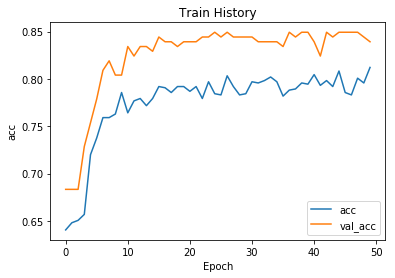

In [40]:
show_train_history(train_history, 'acc', 'val_acc')

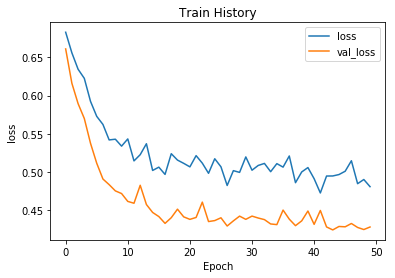

In [41]:
show_train_history(train_history, 'loss', 'val_loss')